In [1]:
import csv

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

In [2]:
xs = [10.23, 20.16, 30.16, 40.6, 50.3, 60.3, 70.1, 79.7, 89, 98.6]
ys = [2.4, 7.6, 16, 28, 43.4, 58, 75, 94, 116, 141]

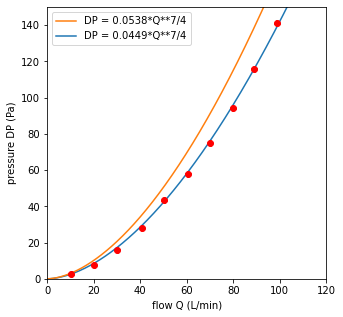

In [11]:
def baseline(x, constant):
    return constant * x**(7.0/4.0)

(baseline_constant,), covariance = scipy.optimize.curve_fit(baseline, xs, ys)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
curve_xs = np.linspace(0, 120, 500)
h2, = ax.plot(curve_xs, baseline(curve_xs, baseline_constant), label="DP = {:.4f}*Q**7/4".format(baseline_constant))
h1, = ax.plot(curve_xs, baseline(curve_xs, 0.0538), label="DP = 0.0538*Q**7/4")
h0 = ax.errorbar(xs, ys, xerr=0.2, yerr=0.2, fmt="o", c="red", capsize=3)
ax.set_xlim(0, 120)
ax.set_ylim(0, 150)
ax.set_xlabel("flow Q (L/min)")
ax.set_ylabel("pressure DP (Pa)")
ax.legend(handles=[h1, h2])
fig.savefig("WS_lpm_calibration-2.pdf")